In [107]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [108]:
df_weight = pd.read_csv('./data/막곡농장 통합체중계.csv')
df_weight['FILE_INFO'] = [x[1:-1] for x in df_weight['FILE_INFO'].str.split(",")]
df_weight['FILE_NAME'] = df_weight.FILE_NAME.str.replace("FA0006_GW01_","")
df_weight['CREATE_TIME'] = df_weight['CREATE_TIME'].astype('str')
df_weight['CREATE_TIME'] = pd.to_datetime(df_weight['CREATE_TIME'])
df_weight

,TID,CREATE_TIME,FARM_ID,GATEWAY_ID,HOUSE_ID,MODULE_ID,DATA_TYPE,FILE_NAME,FILE_INFO,FILE_SIZE,FILE_DATE
0,501f6af84485,2022-04-06 11:03:56,FA0006,GW01,H04,WE02084,real,H04_WE02084_20220406110356_farm_image_real_501...,"[50.8, 51.3, 51.3, 50.4, 52.1, 52.3, 52.3, 52....",143434,\N
1,3da4ef144abe,2022-04-08 06:47:28,FA0006,GW01,H02,WE02082,real,H02_WE02082_20220408064728_farm_image_real_3da...,"[59.7, 59.1, 59.3, 61.7, 60.4, 59.7, 59.7, 60....",240000,\N
2,185bafff4b41,2022-04-09 16:33:07,FA0006,GW01,H02,WE02082,real,H02_WE02082_20220409163307_farm_image_real_185...,"[137.1, 137.8, 134.5, 138.0, 134.1, 133.6, 133...",257324,\N
3,1f2746fc4f55,2022-04-09 10:21:33,FA0006,GW01,H04,WE02084,real,H04_WE02084_20220409102133_farm_image_real_1f2...,"[81.0, 82.4, 80.6, 80.1, 82.5, 81.6, 82.7, 80....",154818,\N
4,2df4875d4ce1,2022-04-09 13:43:10,FA0006,GW01,H02,WE02082,real,H02_WE02082_20220409134310_farm_image_real_2df...,"[83.0, 81.5, 83.4, 81.8, 81.3, 82.2, 82.9, 82....",249080,\N
...,...,...,...,...,...,...,...,...,...,...,...
27223,fe98216b4bba,2022-05-07 02:16:16,FA0006,GW01,H04,WE02084,real,H04_WE02084_20220507021616_farm_image_real_fe9...,"[1723.6, 1718.6, 1723.6, 1719.4, 1723.7, 1719....",96592,\N
27224,ff5c8d33454e,2022-05-07 05:27:37,FA0006,GW01,H04,WE02084,real,H04_WE02084_20220507052737_farm_image_real_ff5...,"[605.4, 603.0, 599.3, 599.8, 608.2, 594.3, 599...",106702,\N
27225,ff76369c4aea,2022-05-07 05:17:49,FA0006,GW01,H04,WE02084,real,H04_WE02084_20220507051749_farm_image_real_ff7...,"[255.7, 245.5, 276.6, 248.5, 263.9, 256.5, 271...",107728,\N
27226,ffcc9ac940a4,2022-05-07 08:23:48,FA0006,GW01,H02,WE02082,real,H02_WE02082_20220507082348_farm_image_real_ffc...,"[2274.9, 2525.7, 1521.7, 1099.0, 1121.7, 1147....",95593,\N


In [18]:
def remove_str(x):
    x = x.replace('[',"")
    x = x.replace(']',"")
    arr_list = list(map(int, x.split(",")))
    #result = round(sum(arr_list) / len(arr_list),1) # 중앙값
    return arr_list

df_pixel = pd.read_csv('./data/막곡농장 통합체중계이미지데이터.csv')
df_pixel['house_id'] = [x[0] for x in df_pixel['image_name'].str.split("_")]
df_pixel['pixel_list'] = df_pixel['pixel_list'].apply(remove_str)
df_pixel

,date,image_name,pixel_list,pixel_count,house_id
0,2.02204E+13,H01_WE02081_20220421025030_farm_image_real_2b1...,[52558],1,H01
1,2.02204E+13,H01_WE02081_20220421030419_farm_image_real_45d...,"[43536, 40655]",2,H01
2,2.02204E+13,H01_WE02081_20220421031425_farm_image_real_c76...,"[46328, 42411]",2,H01
3,2.02204E+13,H01_WE02081_20220421032449_farm_image_real_9d0...,"[52771, 60277]",2,H01
4,2.02204E+13,H01_WE02081_20220421033740_farm_image_real_e5f...,"[32754, 41546]",2,H01
...,...,...,...,...,...
11691,2.02204E+13,H04_WE02084_20220421014140_farm_image_real_b15...,[53732],1,H04
11692,2.02204E+13,H04_WE02084_20220421015123_farm_image_real_886...,[43246],1,H04
11693,2.02204E+13,H04_WE02084_20220421024224_farm_image_real_34f...,[40303],1,H04
11694,2.02204E+13,H04_WE02084_20220421031622_farm_image_real_a6c...,[59523],1,H04


In [19]:
df_INNER_JOIN = pd.merge(df_weight, df_pixel, left_on='FILE_NAME', right_on='image_name', how='inner')[['FILE_NAME','HOUSE_ID','MODULE_ID','FILE_INFO','CREATE_TIME','pixel_list','pixel_count']]
df_INNER_JOIN

,FILE_NAME,HOUSE_ID,MODULE_ID,FILE_INFO,CREATE_TIME,pixel_list,pixel_count
0,H01_WE02081_20220410034414_farm_image_real_0cd...,H01,WE02081,"[94.8, 95.2, 93.4, 92.8, 96.0, 93.1, 94.6, 93....",2022-04-10 03:44:14,[13464],1
1,H02_WE02082_20220410132328_farm_image_real_16a...,H02,WE02082,"[82.0, 82.9, 85.4, 83.0, 84.3, 84.3, 84.5, 83....",2022-04-10 13:23:28,"[19254, 18633]",2
2,H02_WE02082_20220410082802_farm_image_real_1c0...,H02,WE02082,"[75.6, 73.8, 72.2, 70.9, 70.9, 70.3, 69.6, 69....",2022-04-10 08:28:02,[19473],1
3,H02_WE02082_20220410124231_farm_image_real_2d0...,H02,WE02082,"[175.6, 180.8, 179.6, 177.2, 179.6, 178.0, 176...",2022-04-10 12:42:31,[19705],1
4,H02_WE02082_20220410130050_farm_image_real_2f7...,H02,WE02082,"[275.3, 272.7, 272.8, 275.6, 273.4, 274.2, 273...",2022-04-10 13:00:50,"[18858, 17582]",2
...,...,...,...,...,...,...,...
12078,H04_WE02084_20220502173834_farm_image_real_fe7...,H04,WE02084,"[1085.1, 1097.1, 1079.7, 1088.5, 1088.1, 1079....",2022-05-02 17:38:34,[94992],1
12079,H02_WE02082_20220502022830_farm_image_real_fe8...,H02,WE02082,"[2781.6, 2844.3, 2909.0, 2912.7, 2954.0, 3051....",2022-05-02 02:28:30,[102424],1
12080,H04_WE02084_20220502050349_farm_image_real_fe9...,H04,WE02084,"[177.6, 174.5, 172.5, 172.8, 179.4, 170.7, 175...",2022-05-02 05:03:49,[70706],1
12081,H02_WE02082_20220502154944_farm_image_real_fed...,H02,WE02082,"[1841.6, 1770.1, 1851.1, 1865.0, 1839.1, 1835....",2022-05-02 15:49:44,[84080],1


In [51]:
df_labeling = pd.read_csv('./data/H04 labeling.csv')
df_labeling['file_name'] = df_labeling.file_name.str.replace("FA0006_GW01_","")
df_labeling = df_labeling.dropna()
df_labeling['count'] = df_labeling['count'].astype(int)
df_labeling['count']

0       2
1       2
2       4
3       3
4       4
       ..
5723    1
5724    1
5725    1
5726    1
5727    1
Name: count, Length: 5532, dtype: int32

In [114]:
def change_median(x):
    array = list(map(float, x))
    return round(np.median(array),1)
    

df_TOTAL_JOIN = pd.merge(df_INNER_JOIN, df_labeling, left_on='FILE_NAME', right_on='file_name', how='inner')[['FILE_NAME','HOUSE_ID','MODULE_ID','FILE_INFO','CREATE_TIME','pixel_list','pixel_count','count']]
df_TOTAL_JOIN['weight_median'] = df_TOTAL_JOIN['FILE_INFO'].apply(change_median)
df_TOTAL_JOIN

,FILE_NAME,HOUSE_ID,MODULE_ID,FILE_INFO,CREATE_TIME,pixel_list,pixel_count,count,weight_median
0,H04_WE02084_20220410222400_farm_image_real_8db...,H04,WE02084,"[113.9, 111.2, 112.7, 114.6, 115.7, 112.9, 115...",2022-04-10 22:24:00,"[18101, 21267]",2,2,115.4
1,H04_WE02084_20220412235442_farm_image_real_06b...,H04,WE02084,"[122.4, 122.4, 124.0, 126.8, 125.4, 127.6, 124...",2022-04-12 23:54:42,[22683],1,3,126.2
2,H04_WE02084_20220412231626_farm_image_real_09c...,H04,WE02084,"[322.8, 317.1, 316.3, 321.5, 318.5, 317.7, 319...",2022-04-12 23:16:26,[23102],1,4,186.9
3,H04_WE02084_20220412232957_farm_image_real_10a...,H04,WE02084,"[169.5, 169.8, 171.3, 168.1, 169.4, 165.4, 168...",2022-04-12 23:29:57,[36885],1,4,169.8
4,H04_WE02084_20220412130010_farm_image_real_218...,H04,WE02084,"[343.4, 345.7, 342.9, 344.3, 346.7, 343.7, 348...",2022-04-12 13:00:10,"[17895, 17885]",2,5,322.4
...,...,...,...,...,...,...,...,...,...
4551,H04_WE02084_20220502034743_farm_image_real_fd4...,H04,WE02084,"[1104.7, 1104.1, 1104.4, 1111.7, 1105.2, 1111....",2022-05-02 03:47:43,[94239],1,1,1103.8
4552,H04_WE02084_20220502115158_farm_image_real_fde...,H04,WE02084,"[1616.9, 1617.0, 1627.5, 1622.0, 1617.8, 1623....",2022-05-02 11:51:58,[84267],1,1,1623.2
4553,H04_WE02084_20220502030158_farm_image_real_fde...,H04,WE02084,"[119.7, 124.0, 124.3, 122.2, 124.2, 124.9, 127...",2022-05-02 03:01:58,[78128],1,1,124.6
4554,H04_WE02084_20220502173834_farm_image_real_fe7...,H04,WE02084,"[1085.1, 1097.1, 1079.7, 1088.5, 1088.1, 1079....",2022-05-02 17:38:34,[94992],1,1,1073.6


In [145]:
def using_repeat(df,column_name):
    df_column_list = df.columns.tolist()
    df_column_list.remove(column_name)
    lens = [len(item) for item in df[column_name]]
    
    return pd.DataFrame( {df_column_list[0] :np.repeat(df[df_column_list[0]].values,lens),
                          df_column_list[1] :np.repeat(df[df_column_list[1]].values,lens),
                          df_column_list[2] :np.repeat(df[df_column_list[2]].values,lens),
                          df_column_list[3] :np.repeat(df[df_column_list[3]].values,lens),
                          df_column_list[4] :np.repeat(df[df_column_list[4]].values,lens),
                          df_column_list[5] :np.repeat(df[df_column_list[5]].values,lens),
                          df_column_list[6] :np.repeat(df[df_column_list[6]].values,lens),
                          df_column_list[7] :np.repeat(df[df_column_list[7]].values,lens),
                        column_name : np.concatenate(df[column_name].values)})

#result_df = using_repeat(df_TOTAL_JOIN,'FILE_INFO')
result_df = using_repeat(df_TOTAL_JOIN,'pixel_list')
result_df

,FILE_NAME,HOUSE_ID,MODULE_ID,FILE_INFO,CREATE_TIME,pixel_count,count,weight_median,pixel_list
0,H04_WE02084_20220410222400_farm_image_real_8db...,H04,WE02084,"[113.9, 111.2, 112.7, 114.6, 115.7, 112.9, 115...",2022-04-10 22:24:00,2,2,115.4,18101
1,H04_WE02084_20220410222400_farm_image_real_8db...,H04,WE02084,"[113.9, 111.2, 112.7, 114.6, 115.7, 112.9, 115...",2022-04-10 22:24:00,2,2,115.4,21267
2,H04_WE02084_20220412235442_farm_image_real_06b...,H04,WE02084,"[122.4, 122.4, 124.0, 126.8, 125.4, 127.6, 124...",2022-04-12 23:54:42,1,3,126.2,22683
3,H04_WE02084_20220412231626_farm_image_real_09c...,H04,WE02084,"[322.8, 317.1, 316.3, 321.5, 318.5, 317.7, 319...",2022-04-12 23:16:26,1,4,186.9,23102
4,H04_WE02084_20220412232957_farm_image_real_10a...,H04,WE02084,"[169.5, 169.8, 171.3, 168.1, 169.4, 165.4, 168...",2022-04-12 23:29:57,1,4,169.8,36885
...,...,...,...,...,...,...,...,...,...
5443,H04_WE02084_20220502034743_farm_image_real_fd4...,H04,WE02084,"[1104.7, 1104.1, 1104.4, 1111.7, 1105.2, 1111....",2022-05-02 03:47:43,1,1,1103.8,94239
5444,H04_WE02084_20220502115158_farm_image_real_fde...,H04,WE02084,"[1616.9, 1617.0, 1627.5, 1622.0, 1617.8, 1623....",2022-05-02 11:51:58,1,1,1623.2,84267
5445,H04_WE02084_20220502030158_farm_image_real_fde...,H04,WE02084,"[119.7, 124.0, 124.3, 122.2, 124.2, 124.9, 127...",2022-05-02 03:01:58,1,1,124.6,78128
5446,H04_WE02084_20220502173834_farm_image_real_fe7...,H04,WE02084,"[1085.1, 1097.1, 1079.7, 1088.5, 1088.1, 1079....",2022-05-02 17:38:34,1,1,1073.6,94992


In [146]:
df_data = result_df[(result_df['count']==2) & (result_df['pixel_count']==2) & (result_df['weight_median'] >0 )]
df_data = df_data.reset_index(drop=True)
df_data

,FILE_NAME,HOUSE_ID,MODULE_ID,FILE_INFO,CREATE_TIME,pixel_count,count,weight_median,pixel_list
0,H04_WE02084_20220410222400_farm_image_real_8db...,H04,WE02084,"[113.9, 111.2, 112.7, 114.6, 115.7, 112.9, 115...",2022-04-10 22:24:00,2,2,115.4,18101
1,H04_WE02084_20220410222400_farm_image_real_8db...,H04,WE02084,"[113.9, 111.2, 112.7, 114.6, 115.7, 112.9, 115...",2022-04-10 22:24:00,2,2,115.4,21267
2,H04_WE02084_20220413014425_farm_image_real_406...,H04,WE02084,"[137.9, 140.0, 135.9, 141.9, 144.7, 142.8, 141...",2022-04-13 01:44:25,2,2,139.8,22840
3,H04_WE02084_20220413014425_farm_image_real_406...,H04,WE02084,"[137.9, 140.0, 135.9, 141.9, 144.7, 142.8, 141...",2022-04-13 01:44:25,2,2,139.8,21431
4,H04_WE02084_20220413083216_farm_image_real_f38...,H04,WE02084,"[60.7, 64.7, 62.3, 62.5, 65.7, 61.0, 63.7, 60....",2022-04-13 08:32:16,2,2,62.4,24805
...,...,...,...,...,...,...,...,...,...
1267,H04_WE02084_20220502073942_farm_image_real_ee4...,H04,WE02084,"[607.5, 611.7, 611.6, 613.8, 612.6, 612.3, 611...",2022-05-02 07:39:42,2,2,611.7,68404
1268,H04_WE02084_20220502114200_farm_image_real_ef8...,H04,WE02084,"[2822.8, 2820.3, 2827.1, 2827.8, 2817.3, 2827....",2022-05-02 11:42:00,2,2,2824.0,102761
1269,H04_WE02084_20220502114200_farm_image_real_ef8...,H04,WE02084,"[2822.8, 2820.3, 2827.1, 2827.8, 2817.3, 2827....",2022-05-02 11:42:00,2,2,2824.0,85082
1270,H04_WE02084_20220502033850_farm_image_real_f23...,H04,WE02084,"[2372.6, 2377.4, 2374.9, 2374.3, 2379.0, 2376....",2022-05-02 03:38:50,2,2,2376.3,67809


In [147]:
# plt.figure(figsize=(20,10))
# plt.title('막곡 통합체중계 -  H01 (raw Weight)')

# plt.scatter(df_data['CREATE_TIME'], df_data['FILE_INFO'], c='blue')
# plt.show()

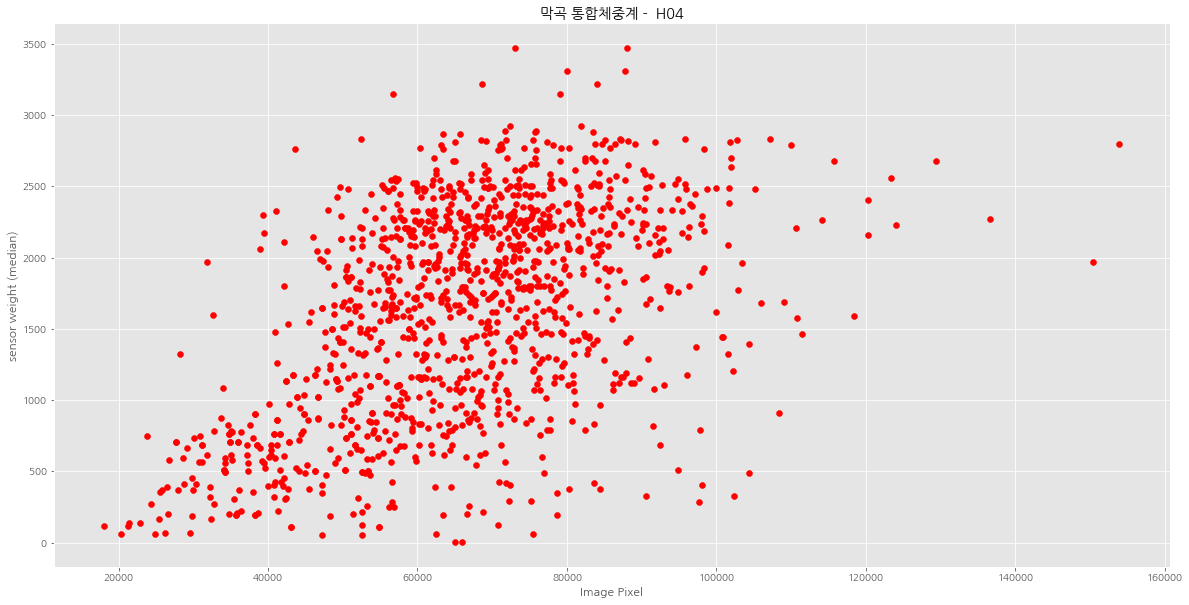

In [148]:
plt.figure(figsize=(20,10))
plt.title('막곡 통합체중계 -  H04')
plt.xlabel('Image Pixel')
plt.ylabel('sensor weight (median)')

plt.scatter(df_data['pixel_list'], df_data['weight_median'], c='red')
plt.show()

In [165]:
df_data_grouped = df_data.groupby(pd.Grouper(key='CREATE_TIME' ,freq='2h')).median()
df_data_grouped = df_data_grouped.reset_index()
df_data_grouped

,CREATE_TIME,pixel_count,count,weight_median,pixel_list
0,2022-04-10 22:00:00,2.0,2.0,115.4,19684.0
1,2022-04-11 00:00:00,NaN,NaN,NaN,NaN
2,2022-04-11 02:00:00,NaN,NaN,NaN,NaN
3,2022-04-11 04:00:00,NaN,NaN,NaN,NaN
4,2022-04-11 06:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
260,2022-05-02 14:00:00,2.0,2.0,2545.3,82983.5
261,2022-05-02 16:00:00,2.0,2.0,2324.6,81403.5
262,2022-05-02 18:00:00,2.0,2.0,2410.2,91669.0
263,2022-05-02 20:00:00,NaN,NaN,NaN,NaN


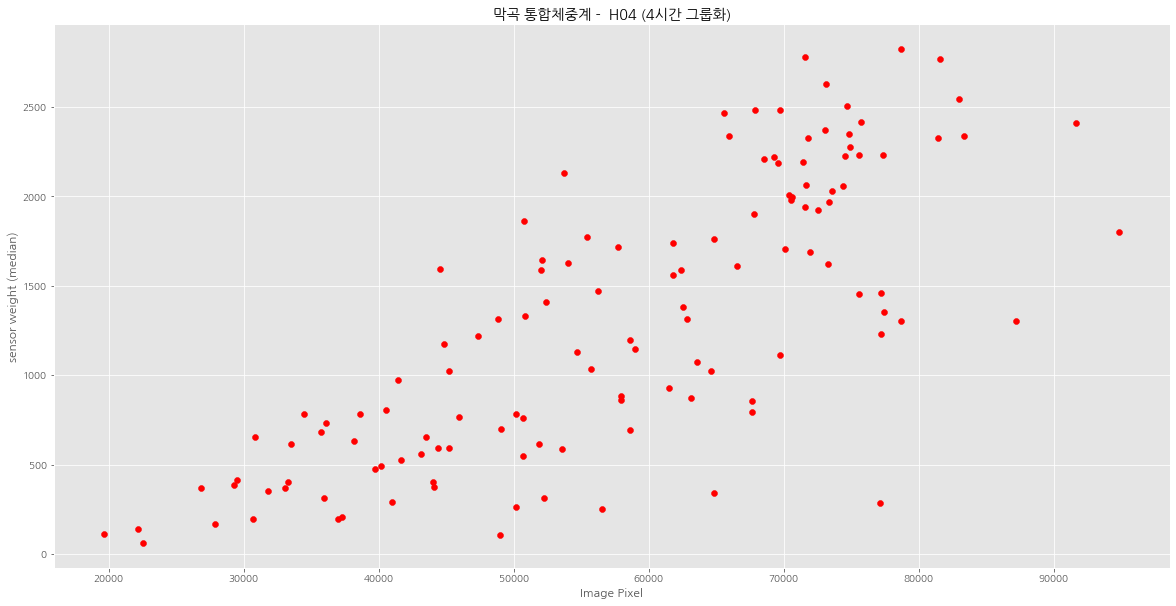

In [166]:
plt.figure(figsize=(20,10))
plt.title('막곡 통합체중계 -  H04 (4시간 그룹화)')
plt.xlabel('Image Pixel')
plt.ylabel('sensor weight (median)')

plt.scatter(df_data_grouped['pixel_list'], df_data_grouped['weight_median'], c='red')
plt.show()

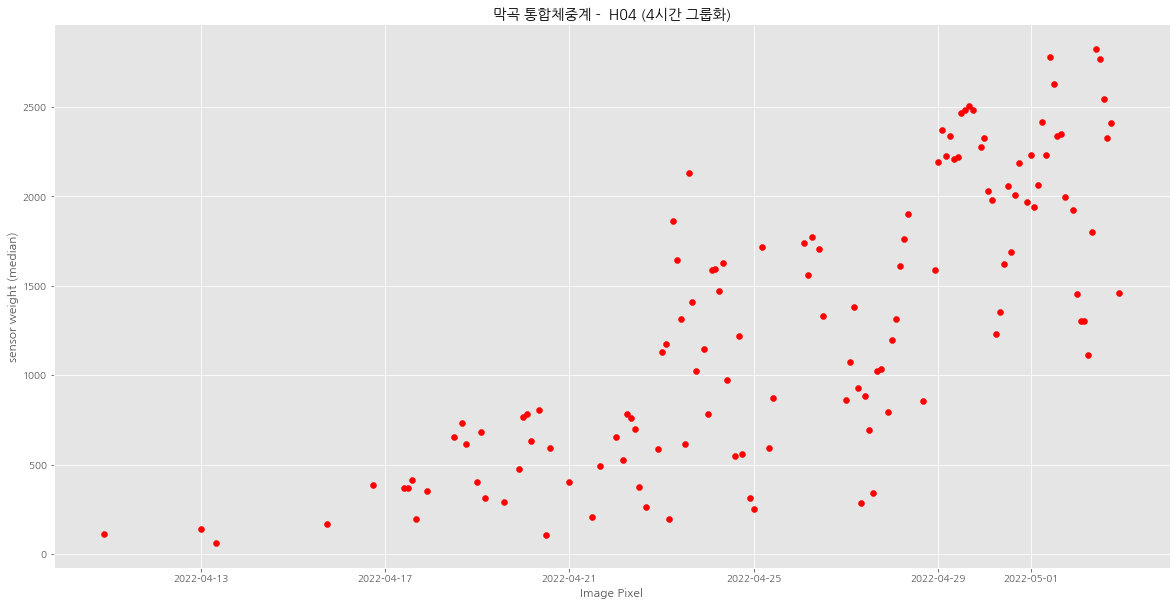

In [167]:
plt.figure(figsize=(20,10))
plt.title('막곡 통합체중계 -  H04 (4시간 그룹화)')
plt.xlabel('Image Pixel')
plt.ylabel('sensor weight (median)')

plt.scatter(df_data_grouped['CREATE_TIME'], df_data_grouped['weight_median'], c='red')
plt.show()

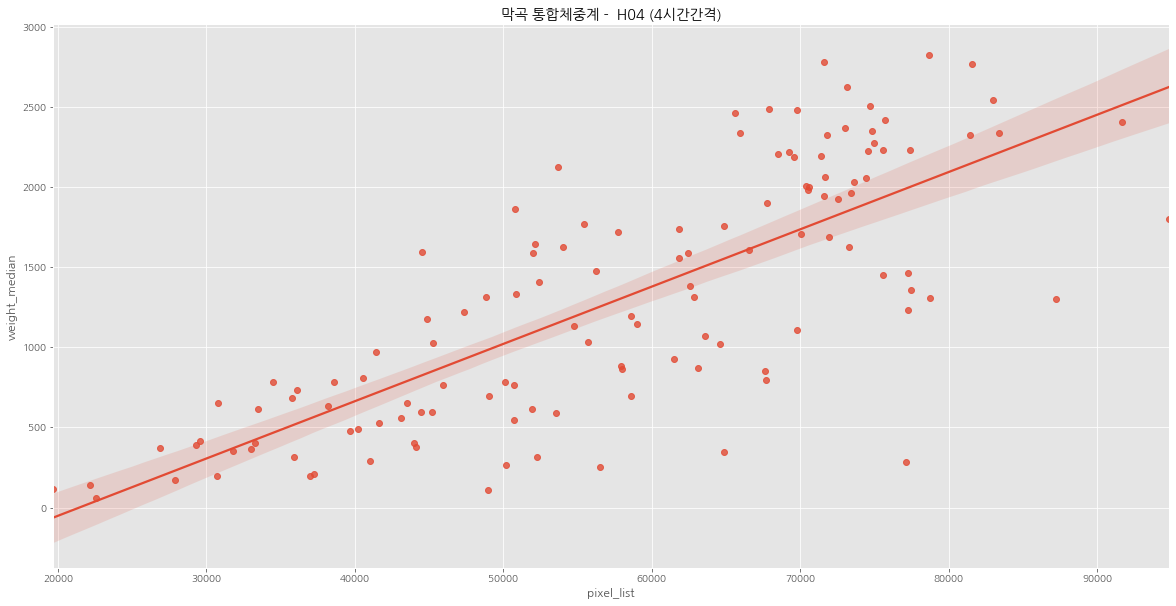

In [168]:
plt.figure(figsize=(20,10))

sns.regplot(x='pixel_list', y='weight_median', data = df_data_grouped, scatter=True)
plt.title('막곡 통합체중계 -  H04 (4시간간격)')
plt.show()

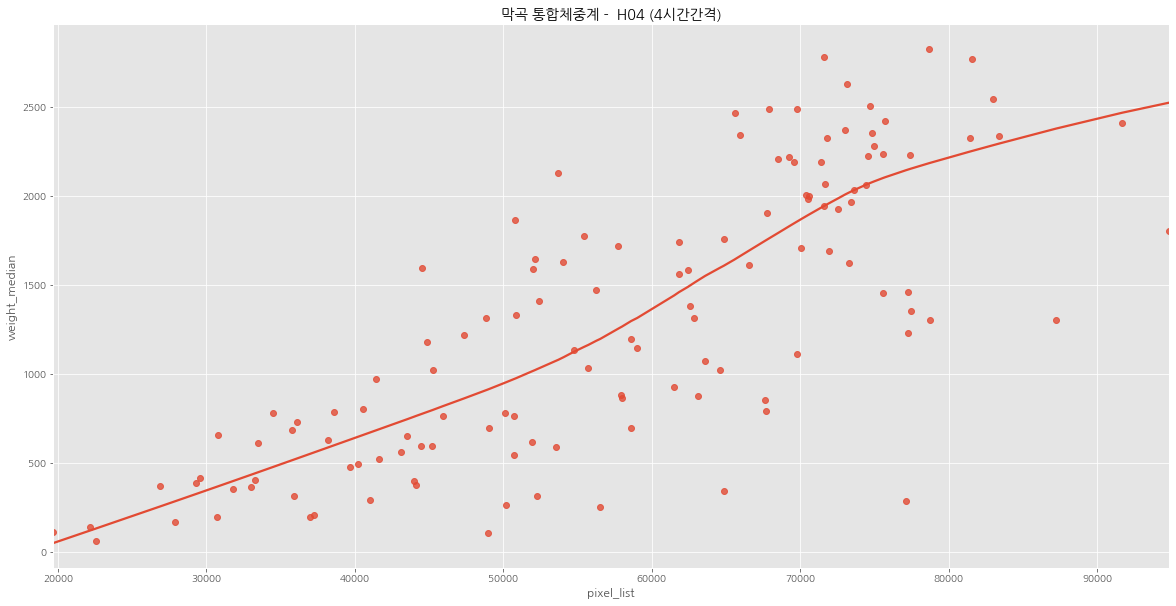

In [169]:
plt.figure(figsize=(20,10))

sns.regplot(x='pixel_list', y='weight_median', data = df_data_grouped, scatter=True, lowess=True)
plt.title('막곡 통합체중계 -  H04 (4시간간격)')
plt.show()